In [124]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
train=pd.read_csv("train.csv")
val=pd.read_csv("validation.csv")
test=pd.read_csv("test.csv")

In [ ]:
y_train,X_train=train["Label"],train["Text"]
y_val,X_val=val["Label"],val["Text"]
y_test,X_test=test["Label"],test["Text"]

In [ ]:
# transform the text data to feature vectors that can be used as input for the models
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
X_val_features = feature_extraction.transform(X_val)

y_train = y_train.astype('int')
y_test = y_test.astype('int')
y_val = y_val.astype('int')

#Naive Bayes 


**Bernoulli NB**

In [ ]:
modelbnb = BernoulliNB()
modelbnb.fit(X_train_features.toarray() , y_train)

BernoulliNB()

In [ ]:
# prediction on training data

prediction_on_training_data = modelbnb.predict(X_train_features.toarray())
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ', round(accuracy_on_training_data * 100,3), "%")

Accuracy on training data :  98.744 %


In [ ]:
# prediction on Validation data

prediction_on_val_data = modelbnb.predict(X_val_features.toarray())
accuracy_on_val_data = accuracy_score(y_val, prediction_on_val_data)

In [ ]:
print('Accuracy on Validation data : ', round(accuracy_on_val_data * 100,3), "%")

Accuracy on Validation data :  97.129 %


In [ ]:
# prediction on test data
y_pred = modelbnb.predict(X_test_features.toarray())
accuracy_on_test_data = round(accuracy_score(y_test, y_pred) * 100,3)

In [ ]:
print('Accuracy on test data : ', accuracy_on_test_data, "%")

Accuracy on test data :  97.608 %


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       726
           1       1.00      0.82      0.90       110

    accuracy                           0.98       836
   macro avg       0.99      0.91      0.94       836
weighted avg       0.98      0.98      0.98       836



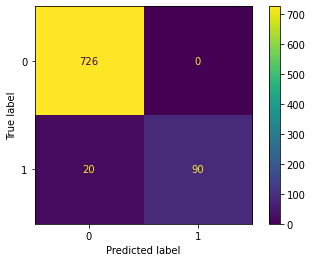

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=modelbnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelbnb.classes_)
disp.plot()
plt.show()

**Gaussian NB**


In [ ]:
modelgnb = GaussianNB()
modelgnb.fit(X_train_features.toarray() , y_train)

GaussianNB()

In [ ]:
prediction_on_training_data = modelgnb.predict(X_train_features.toarray())
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ', round(accuracy_on_training_data * 100,3), "%")

Accuracy on training data :  94.231 %


In [ ]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# cv_method = RepeatedStratifiedKFold(n_splits=50,  n_repeats=3, random_state=999)

# from sklearn.preprocessing import PowerTransformer
# params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
# gs_NB = GridSearchCV(estimator=modelgnb, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')


In [128]:
# prediction on Validation data

prediction_on_val_data = modelgnb.predict(X_val_features.toarray())
# pred_on_val_data = gs_NB.fit(X_val_features.toarray(), y_val)
accuracy_on_val_data = accuracy_score(y_val, prediction_on_val_data)

In [129]:
print('Accuracy on Validation data : ', round(accuracy_on_val_data * 100,3), "%")

Accuracy on Validation data :  89.234 %


In [ ]:
# prediction on test data
y_pred = modelgnb.predict(X_test_features.toarray())
accuracy_on_test_data = round(accuracy_score(y_test, y_pred) * 100,3)

In [ ]:
print('Accuracy on test data : ', accuracy_on_test_data, "%")

Accuracy on test data :  88.995 %


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       726
           1       0.55      0.89      0.68       110

    accuracy                           0.89       836
   macro avg       0.77      0.89      0.81       836
weighted avg       0.93      0.89      0.90       836



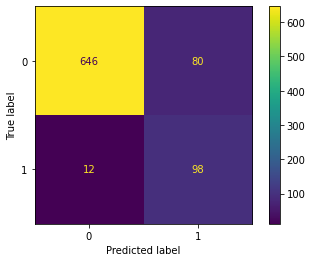

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=modelgnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelgnb.classes_)
disp.plot()
plt.show()

# Logistic Regression

In [ ]:
modellr = LogisticRegression()

In [ ]:
# training the Logistic Regression model with the training data
modellr.fit(X_train_features, y_train)

LogisticRegression()

In [ ]:
# prediction on training data
prediction_on_training_data = modellr.predict(X_train_features)
accuracy_on_training_data = round(accuracy_score(y_train, prediction_on_training_data) * 100,3)

In [ ]:
print('Accuracy on training data : ', accuracy_on_training_data, "%")

Accuracy on training data :  96.795 %


In [ ]:
# prediction on Validation data

prediction_on_val_data = modellr.predict(X_val_features.toarray())
accuracy_on_val_data = accuracy_score(y_val, prediction_on_val_data)

In [ ]:
print('Accuracy on Validation data : ', round(accuracy_on_val_data * 100,3), "%")

Accuracy on Validation data :  96.053 %


In [ ]:
# prediction on test data
y_pred = modellr.predict(X_test_features)
accuracy_on_test_data = round(accuracy_score(y_test, y_pred) * 100,3)

In [ ]:
print('Accuracy on test data : ', accuracy_on_test_data, "%")

Accuracy on test data :  95.455 %


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       726
           1       0.97      0.67      0.80       110

    accuracy                           0.95       836
   macro avg       0.96      0.83      0.89       836
weighted avg       0.96      0.95      0.95       836



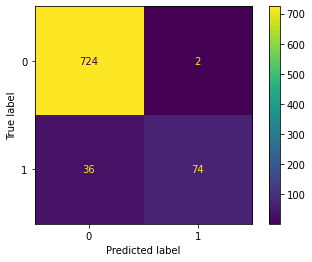

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=modellr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modellr.classes_)
disp.plot()
plt.show()

# MLP Classifier

In [ ]:
modelmlp = MLPClassifier()
modelmlp.fit(X_train_features, y_train)

MLPClassifier()

In [ ]:
# prediction on training data
prediction_on_training_data = modelmlp.predict(X_train_features)
accuracy_on_training_data = round(accuracy_score(y_train, prediction_on_training_data) * 100, 3)

In [ ]:
print('Accuracy on training data : ', accuracy_on_training_data, "%")

Accuracy on training data :  100.0 %


In [ ]:
# prediction on Validation data

prediction_on_val_data = modelmlp.predict(X_val_features.toarray())
accuracy_on_val_data = accuracy_score(y_val, prediction_on_val_data)

In [ ]:
print('Accuracy on Validation data : ', round(accuracy_on_val_data * 100,3), "%")

Accuracy on Validation data :  99.163 %


In [ ]:
# prediction on test data
y_pred = modelmlp.predict(X_test_features)
accuracy_on_test_data = round(accuracy_score(y_test, y_pred) * 100,3)

In [ ]:
print('Accuracy on test data : ', accuracy_on_test_data, "%")

Accuracy on test data :  99.043 %


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       726
           1       0.99      0.94      0.96       110

    accuracy                           0.99       836
   macro avg       0.99      0.97      0.98       836
weighted avg       0.99      0.99      0.99       836



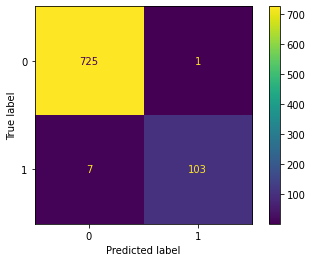

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=modelmlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelmlp.classes_)
disp.plot()
plt.show()

**In terms of accuracy, F1 score and precision values, the Multi Layer perceptron is the best performing one, since for this specific task, we have to maximise precision.**


**Bernoulli Naive Bayes is also performing well for this model.**